In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Please first download the Microsoft and S&P data that I uploaded on KLE in the Week 10 tutorial folder. After downloading the files, upload them into Kaggle.**

* Step 1 — Upload your files to Kaggle

Open your Kaggle Notebook

On the right-hand side, click “Add data”

Choose “Upload file”

Upload MSFT.csv and SP500.csv

Kaggle will save them


# Load Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

Now upload both the S&P and Microsoft datasets into the Kaggle notebook that you previously uploaded to Kaggle.

In [31]:
ms = pd.read_csv('/kaggle/input/d/robinaz/microsoft/Microsoft.csv')

sp = pd.read_csv('/kaggle/input/spdata/SP.csv')

In [11]:
#Head (first rows of the DataFrame)
ms.head()

,Dates,msprices
0,07/10/2022,234.24
1,06/10/2022,246.79
2,05/10/2022,249.20
3,04/10/2022,248.88
4,03/10/2022,240.74


In [12]:
#Head (first rows of the DataFrame)
sp.head()

,Dates,spprices
0,07/10/2022,3639.66
1,06/10/2022,3744.52
2,05/10/2022,3783.28
3,04/10/2022,3790.93
4,03/10/2022,3678.43


# Check the datatype

In [32]:
#Check what your Dates column looks like for ms
print(ms['Dates'].dtype)

object


In [33]:
#Check what your Dates column looks like for sp
print(sp['Dates'].dtype)

object


# object means our Years column is stored as text, not numbers or real dates.

# Convert the Dates column to datetime

In [34]:
#Convert Dates to datetime format
ms['Dates'] = pd.to_datetime(ms['Dates'], dayfirst=True)
sp['Dates'] = pd.to_datetime(sp['Dates'], dayfirst=True)

# We are converting the Years column into proper datetime format using pd.to_datetime() with dayfirst=True because the dates are in DD/MM/YYYY format.

# Merge Microsoft and SP500 data into one DataFrame

In [35]:
#Merge the two datasets on the Dates column
combined = pd.merge(ms, sp, on='Dates', how='inner')

In [36]:
#Display the merged dataset
combined.head()

,Dates,msprices,spprices
0,2022-10-07,234.24,3639.66
1,2022-10-06,246.79,3744.52
2,2022-10-05,249.20,3783.28
3,2022-10-04,248.88,3790.93
4,2022-10-03,240.74,3678.43


# Calculate log returns (continuously compounded returns)

In [37]:
# Calculate log returns
combined['ms_log_return'] = np.log(combined['msprices'] / combined['msprices'].shift(1))
combined['sp_log_return'] = np.log(combined['spprices'] / combined['spprices'].shift(1))

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
# Display the result
combined.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Dates,msprices,spprices,ms_log_return,sp_log_return
0,2022-10-07,234.24,3639.66,NaN,NaN
1,2022-10-06,246.79,3744.52,0.052192,0.028403
2,2022-10-05,249.20,3783.28,0.009718,0.010298
3,2022-10-04,248.88,3790.93,-0.001285,0.002020
4,2022-10-03,240.74,3678.43,-0.033253,-0.030125


In [40]:
# Drop the first row because it will be NaN
combined = combined.dropna()

# Display the result
combined.head()

,Dates,msprices,spprices,ms_log_return,sp_log_return
1,2022-10-06,246.79,3744.52,0.052192,0.028403
2,2022-10-05,249.20,3783.28,0.009718,0.010298
3,2022-10-04,248.88,3790.93,-0.001285,0.002020
4,2022-10-03,240.74,3678.43,-0.033253,-0.030125
5,2022-09-30,232.90,3585.62,-0.033108,-0.025555


# Plotting two prices in the same grid (stacked subplots)

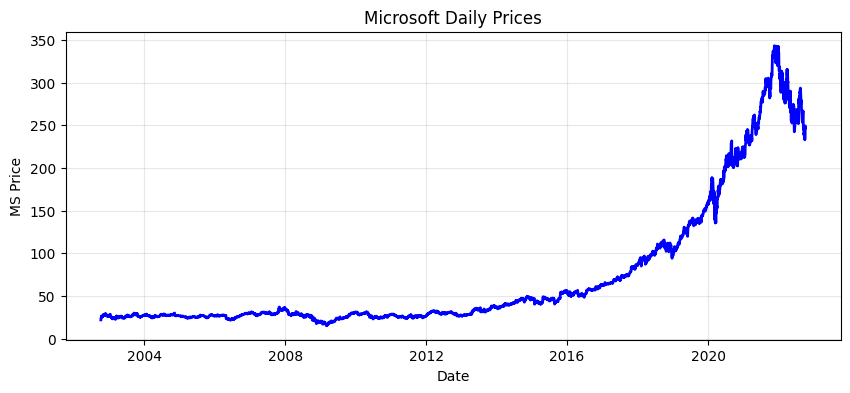

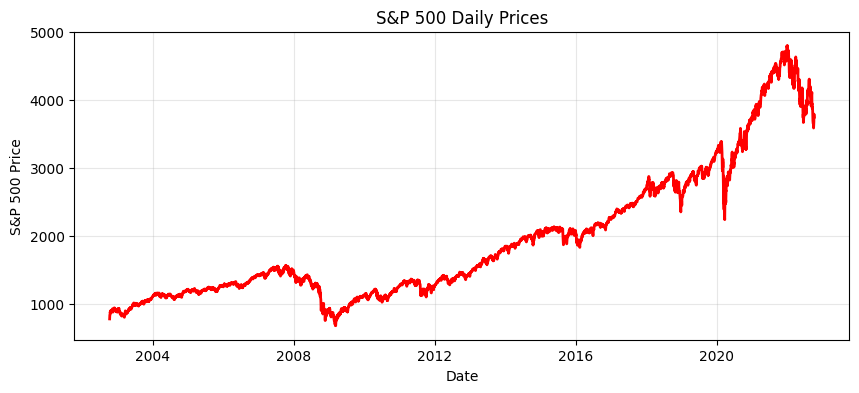

In [43]:
import matplotlib.pyplot as plt

# Microsoft Prices
plt.figure(figsize=(10, 4))
plt.plot(combined['Dates'], combined['msprices'], lw=2, color='blue')
plt.xlabel('Date')
plt.ylabel('MS Price')
plt.title('Microsoft Daily Prices')
plt.grid(True, alpha=0.3)
plt.show()

# S&P 500 Prices
plt.figure(figsize=(10, 4))
plt.plot(combined['Dates'], combined['spprices'], lw=2, color='red')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.title('S&P 500 Daily Prices')
plt.grid(True, alpha=0.3)
plt.show()


# Plot the log returns of both Microsoft and S&P 500 on the same graph

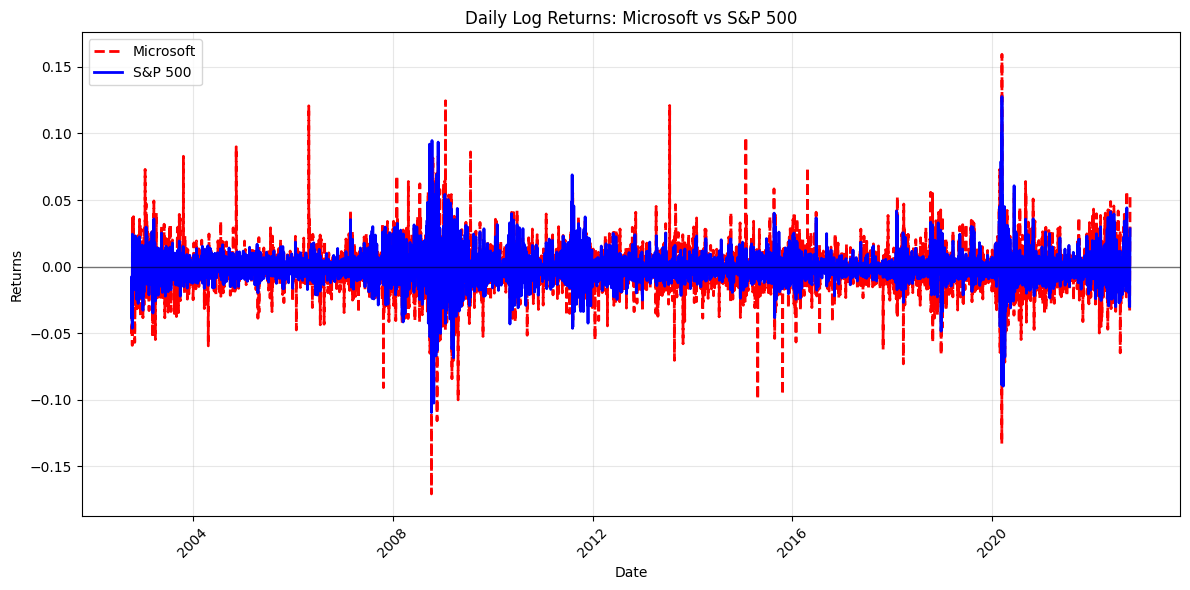

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Microsoft log returns
plt.plot(combined['Dates'], combined['ms_log_return'], color='red', linestyle='dashed', lw=2, label='Microsoft')

# Plot S&P 500 log returns
plt.plot(combined['Dates'], combined['sp_log_return'], color='blue', linestyle='solid', lw=2, label='S&P 500')

# Add horizontal line at 0
plt.axhline(0, color='black', lw=1, alpha=0.5)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily Log Returns: Microsoft vs S&P 500')

# Legend
plt.legend(loc='upper left')

# Grid
plt.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Producing multiple plots in a grid

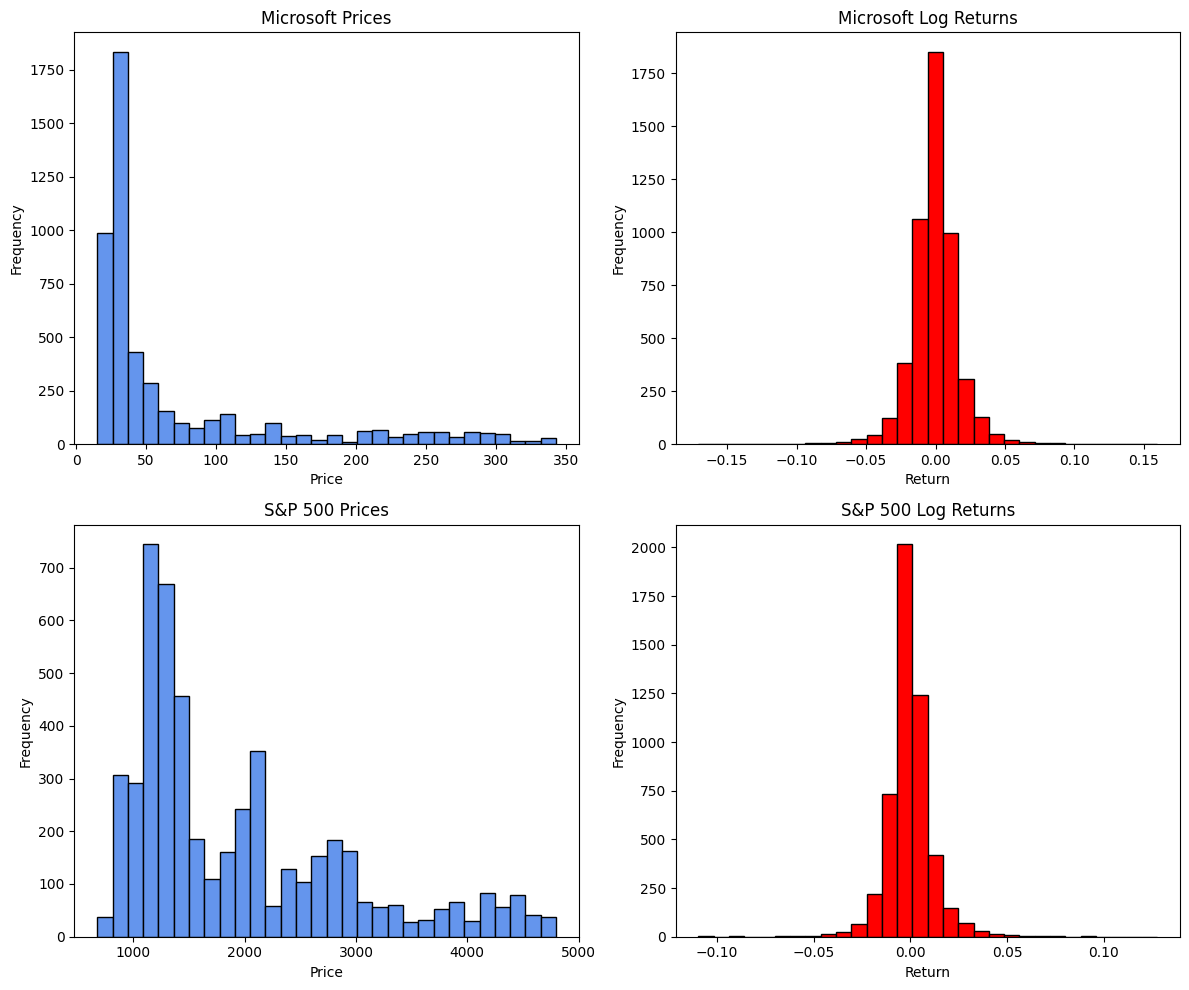

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# 1️⃣ Microsoft Prices
plt.subplot(2, 2, 1)
plt.hist(combined['msprices'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Microsoft Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 2️⃣ Microsoft Returns
plt.subplot(2, 2, 2)
plt.hist(combined['ms_log_return'], bins=30, color='red', edgecolor='black')
plt.title('Microsoft Log Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

# 3️⃣ S&P 500 Prices
plt.subplot(2, 2, 3)
plt.hist(combined['spprices'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('S&P 500 Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 4️⃣ S&P 500 Returns
plt.subplot(2, 2, 4)
plt.hist(combined['sp_log_return'], bins=30, color='red', edgecolor='black')
plt.title('S&P 500 Log Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plot return histograms with density curves (2-plot grid)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

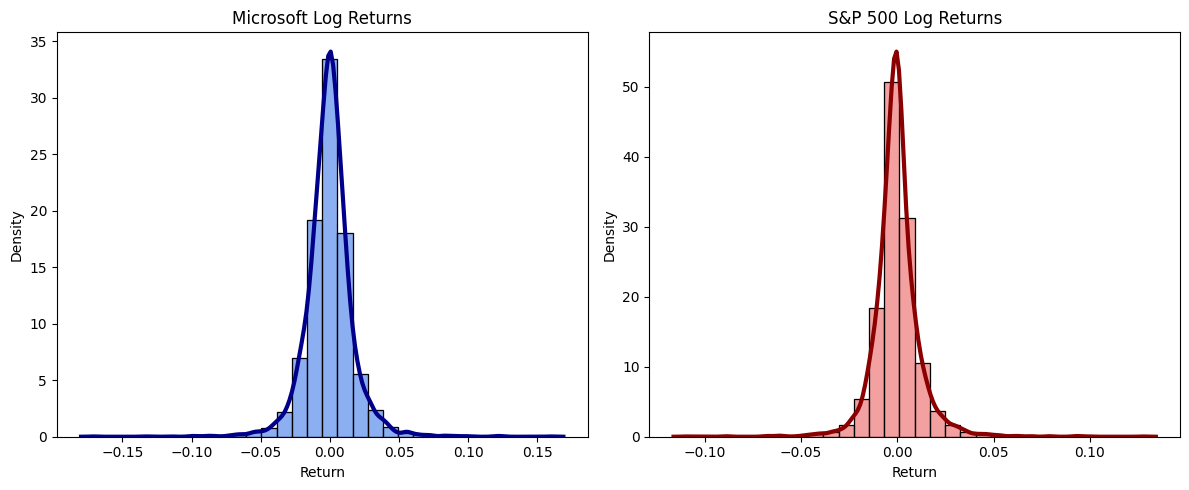

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 1️⃣ Microsoft Log Returns
plt.subplot(1, 2, 1)
sns.histplot(combined['ms_log_return'], bins=30, color='cornflowerblue', edgecolor='black', stat='density')
sns.kdeplot(combined['ms_log_return'], color='darkblue', lw=3)  # Density line in different color
plt.title('Microsoft Log Returns')
plt.xlabel('Return')
plt.ylabel('Density')

# 2️⃣ S&P 500 Log Returns
plt.subplot(1, 2, 2)
sns.histplot(combined['sp_log_return'], bins=30, color='lightcoral', edgecolor='black', stat='density')
sns.kdeplot(combined['sp_log_return'], color='darkred', lw=3)  # Density line in different color
plt.title('S&P 500 Log Returns')
plt.xlabel('Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# Plot Equity Curves (cumulative returns)

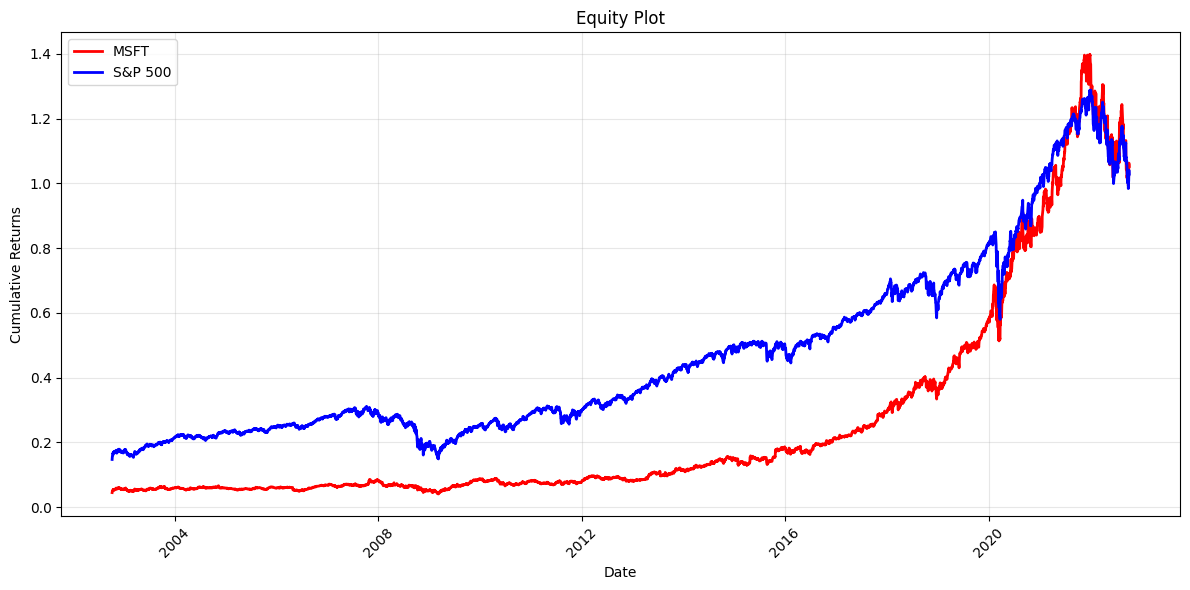

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cumulative returns (equity curves)
equityCurveMsft = (1 + combined['ms_log_return']).cumprod()
equityCurveSp500 = (1 + combined['sp_log_return']).cumprod()

plt.figure(figsize=(12, 6))

# Plot the equity curves
plt.plot(combined['Dates'], equityCurveMsft, color='red', lw=2, label='MSFT')
plt.plot(combined['Dates'], equityCurveSp500, color='blue', lw=2, label='S&P 500')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Equity Plot')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
